In [2]:
using LinearAlgebra
using Plots


In [7]:
function solve_third_order_bvp(;
        ε = 0.01,    # epsilon parameter
        a = 2.0,    # y(0) condition
        b = 1.0,    # y'(0) condition
        c = 3.0,    # y(1) condition
        N = 10_000     # number of grid points
    )
    # Create grid
    x = range(0, 1, length = N)
    h = x[2] - x[1]  # grid spacing

    # Finite difference matrix
    # We'll use a 4-point stencil that incorporates the third derivative
    A = zeros(N, N)
    B = zeros(N)

    # Fill the matrix using finite difference approximations
    for i in 2:(N - 1)
        # Discretized version of ε*y''' = y' + 1
        # Centered finite difference approximations
        A[i, i - 1] = 1 / (h^3 * ε)
        A[i, i] = -2 / (h^3 * ε)
        A[i, i + 1] = 1 / (h^3 * ε)

        # Right-hand side of the equation
        B[i] = 1 / ε
    end

    # Impose initial conditions at x = 0
    A[1, 1] = 1
    B[1] = a

    A[2, 1:3] = [1, -2, 1] / (2 * h)
    B[2] = b

    # Impose boundary condition at x = 1
    A[end, end] = 1
    B[end] = c

    # Solve the linear system
    y = A \ B

    return x, y
end


solve_third_order_bvp (generic function with 1 method)

In [ ]:
# Solve and plot
x, y = solve_third_order_bvp();

(0.0:0.00010001000100010001:1.0, [2.0000000065956884, 1.9999000115985917, 2.000000036603495, 2.0001000616093987, 2.0002000866163026, 2.0003001116242065, 2.0004001366331106, 2.000500161643015, 2.00060018665392, 2.000700211665825  …  2.9990996849928457, 2.9991997199896394, 2.999299754987433, 2.9993997899862275, 2.9994998249860223, 2.999599859986817, 2.9996998949886122, 2.9997999299914078, 2.999899964995204, 3.0])

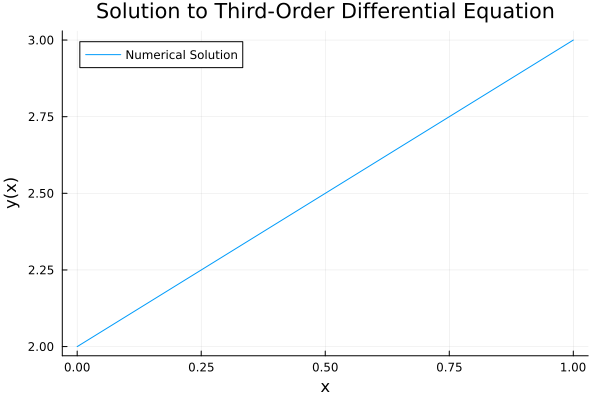

In [22]:
plot(
    x, y,
    title = "Solution to Third-Order Differential Equation",
    xlabel = "x", ylabel = "y(x)",
    label = "Numerical Solution"
)


In [ ]:
# a = 2.0,    # y(0) = 2 condition
# b = 1.0,    # y'(0) = 1 condition
# c = 3.0,    # y(1) = 3 condition

In [19]:
# Verify boundary conditions
function verify_boundary_conditions(x, y)
    # Find indices closest to x = 0 and x = 1
    idx_0 = argmin(abs.(x))
    idx_1 = argmin(abs.(x .- 1))

    println("Boundary Condition Verification:")
    println("y(0) = ", y[idx_0], " (Expected: 2.0)")
    println("y(1) = ", y[idx_1], " (Expected: 3.0)")

    # Approximate first derivative at x = 0 using forward difference
    if idx_0 > 1
        dy_dx_0 = (y[idx_0 + 1] - y[idx_0 - 1]) / (x[idx_0 + 1] - x[idx_0 - 1])
        println("y'(0) = ", dy_dx_0, " (Expected: 1.0)")
    end
end


verify_boundary_conditions (generic function with 1 method)

In [20]:
# Call the verification function
verify_boundary_conditions(x, y)


Boundary Condition Verification:
y(0) = 2.0000000065956884 (Expected: 2.0)
y(1) = 3.0 (Expected: 3.0)
